## Analysis of Life expectancy Dataset Port 4

The goal for this project is to establish and write out analysis and questions that satisfies the objective. This is established with data exploration, data cleansing, splitting, training and testing the dataset. Doing a parameter analsyis to recognise to witness which model gives out the best performance and more.

### Import the Life Expectancy table file

The file is named Life Expectancy Data.csv Utilise the read_csv code from the pandas method

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder 


In [2]:

df = pd.read_csv('Life Expectancy Data.csv') #imports dataset
df.head() #displays the dataset for the first 5 rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Clean and explore the dataset

So the next step is to clean the dataset by detecting if there are any missing or null values and count the total missing values. If there are missing or null values then remove the rows.

In [3]:
#boolean values to see if there are missing values
check_missing = pd.isnull(df)
check_missing 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
pd.isnull(df).sum().sum() # sees the number of missing values  

2563

In [5]:
#counts the number of missing values in each column
drop = df.isnull().sum()
print(drop)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
#dropping = df.dropna(axis = 'rows')
#removes all null values in the dataset
df.dropna(inplace = True)


In [7]:
#checks missing values after missing values removed
drop = df.isnull().sum()
print(drop)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [8]:
df.info() #gets further details about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [9]:
df.describe() #checks the important stats for each numerical columns

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


### Comment

One of the first step was to remove any missing or null values from the dataset which is part of cleaning the data which helps improves the quality of the information and removing any sort of potential errors.

### Converting values and correlation

Variable identification - If there are any categorical values converting into numerical values using the ordencoder function and proceed to find the correlation between different values in relation to Life expectancy 

In [10]:
df.dtypes #checks if columns are ints, floats or objects

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
ord_encoder = OrdinalEncoder() #transforms values into ordinal integers

In [11]:
df["Country"] = ord_encoder.fit_transform(df[['Country']]) #converts categorical vals to numerical

df['Country'].corr(df['Life expectancy ']) #indicates the relation between Country and Life expectancy

-0.11279703667910454

In [12]:
df["Status"] = ord_encoder.fit_transform(df[['Status']]) #convert categorical value to numerical
df['Status'].corr(df['Life expectancy ']) #checks the correlation between Status and Life Expectancy 

-0.44279757614851983

In [13]:
df['Alcohol'].corr(df['Life expectancy ']) #shows the correlation between Alcohol and Life expectancy

0.40271832172735317

In [14]:
df['GDP'].corr(df['Life expectancy ']) #shows relation with GDP and life expectancy

0.4413218099135649

### Comment

Before going further, seeing the correlation between two values is quite important to check the correlation strength between the two values. Status and GDP to the relation of Life expectancy has the strongest correlation for the targeted values as GDP sets on 0.44 and Status is -0.44 which are rounded to 2dp. The given values shows that there is some kind of relation but not a strong one as the values are not too close too 1 or -1.

### Bivariate Data Exploration

Bivarate analysis is a simple quanitative analysis which analysis two variables. In this case a scatter plot will be utilised for further evaluation.



<Axes: xlabel='Alcohol', ylabel='Life expectancy '>

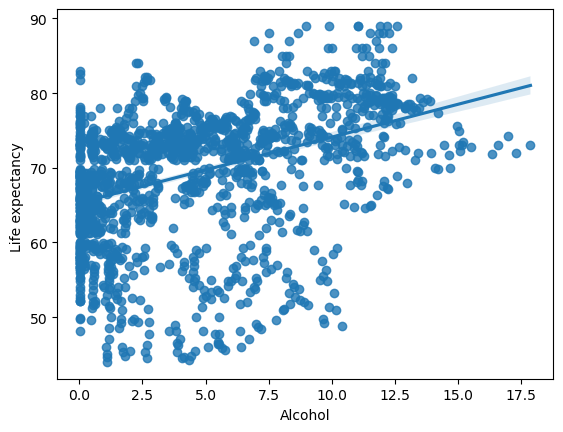

In [15]:
sns.regplot(data = df, x = 'Alcohol', y = 'Life expectancy ') #displays  a scatterplot with alcohol and Lif eexpectancy 

### Comment

The scatter plot shows a relationship between Alcohol and Life expectancy has positive correlation. The graph seems unreasonable as usually as the alcohol consumption increases for indivduals the life expectancy decreases bit in this it is getting alcohol consumption of each country and not just each individual.

<Axes: xlabel='GDP', ylabel='Life expectancy '>

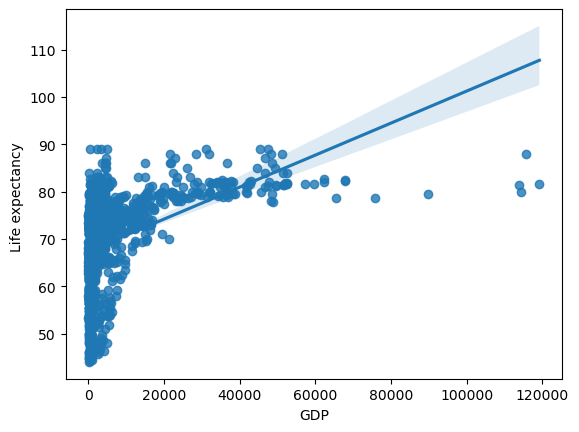

In [16]:
sns.regplot(data = df, x = 'GDP', y = 'Life expectancy ') #shows a scatter plot for GDP and Life expectancy

### Comment

The bivariate scatterplot shows a relation between GDP and Life expectancy. So as the GDP increases, Life expectancy increases. It is somewhat a weak positive correlation and a lot of the values are clustered up into gdp between 0 and 20000.

### Univariate analysis with data exploration

Using a hisograph is a great way to visualise the data for numerical values. In the case of univariate anylsis, there is one variable that is being analysed. Creating a histogram establishes both scenarios in data exploration and univariate analysis.

<Axes: xlabel='Life expectancy ', ylabel='Count'>

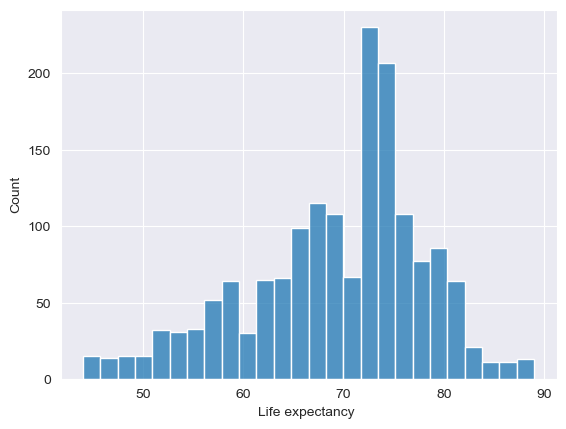

In [17]:
#Displays a histogram  for life expectancy and the count
sns.set_style('darkgrid')
sns.histplot(x = 'Life expectancy ', data = df )


### Comment

The histogram is a univariate analysis which shows the life expectancy from different countries and count of it. The data may seem unusual as it gets the life expectancy of each country between the year 2000 to 2015 but it is not displayed because the graph is specefically just for frequency of the life expectancy.



### Bivarate Histogram

<Axes: xlabel='Life expectancy ', ylabel='GDP'>

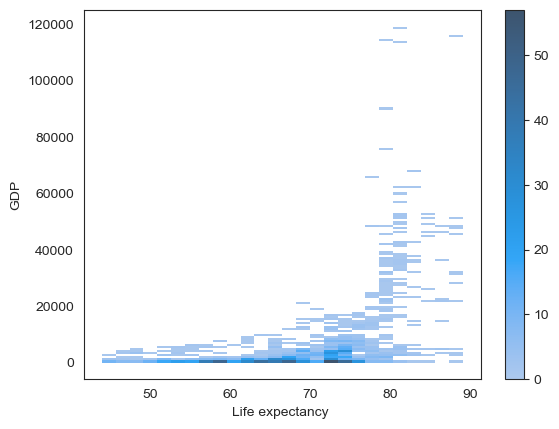

In [18]:
#diplays a histogram  but in a form of a heatmap
sns.set_style('white')
sns.histplot(x = 'Life expectancy ', y = 'GDP', data = df, cbar = True) 

### Comment

This bivarate graph also can be considered as a heatmap which establishes a trend in relation to GDP and Life Expectancy.
Countries that tend to have a low GDP have a lower life expectancy as countries may be less developed so less access to medicines, health insurance and proper care.

### Utilising K-Mean Clusters

Define the number of clusters in the splitted data. The recommended number is 2 clusters so the k and k-mean = 2. Furthermore, choose K random points(recommended amount is 2). Checking the centroids and the chosen points and showing the assigned points and clustered points using the graph

In [19]:
scaler = StandardScaler() #establishing StandardScaler function and storing into the variable called scaler

In [20]:
#Transforming the dataset with a scaler

df[['Country_tra', 'Year_tra', 'Status_tra', 'Life expectancy_tra ', 'Adult Mortality_tra', 'infant deaths_tra', 'Alcohol_tra', 'percentage expenditure_tra',
   'Hepatitis B_tra', 'Measles_tra', 'Polio_tra', 'Total expenditure_tra', 'Diphtheria_tra', 'HIV/AIDS_tra', 'GDP_tra', 'Population_tra',
   'thinness 1-19 years_tra', 'thinness 5-9 years_tra', 'Income composition of resources_tra', 'Schooling_tra']] = scaler.fit_transform(df[['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
   'Hepatitis B', 'Measles ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
   ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']])

In [34]:
#establishing optimal numbers of clusters in the data

def optimise_k_means(data, max_k):
    means_check = []
    inertias_check = []
    
    for i in range(1, max_k):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(data)
        
        means_check.append(i)
        inertias_check.append(kmeans.inertia_)
        
        #establishing the plot
        fig = plt.subplots(figsize =(12,7))
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.plot(means_check, inertias_check, 'o-')
        plt.grid(True)
        plt.show()
        
        

C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


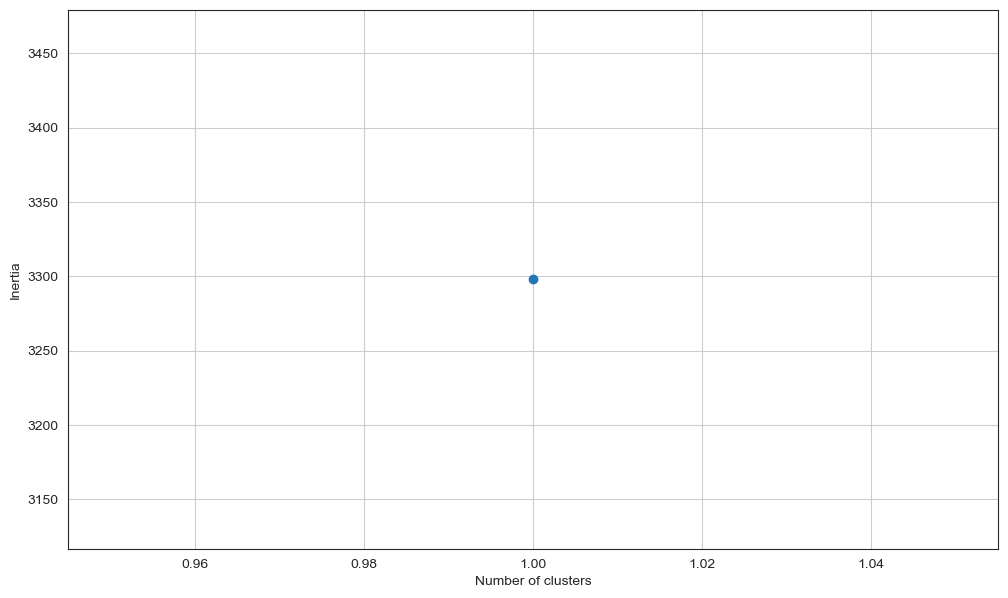

C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


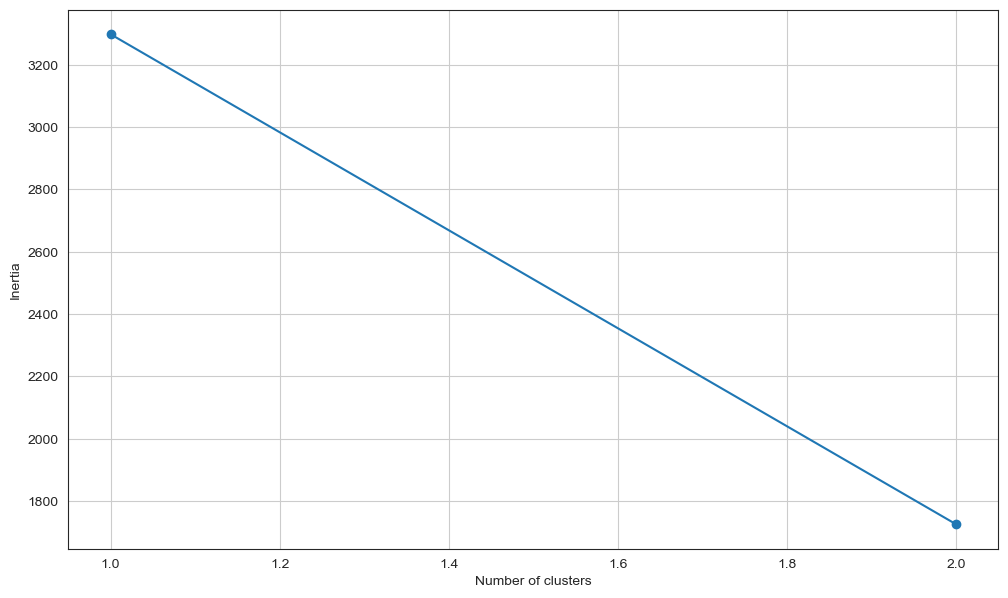

C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


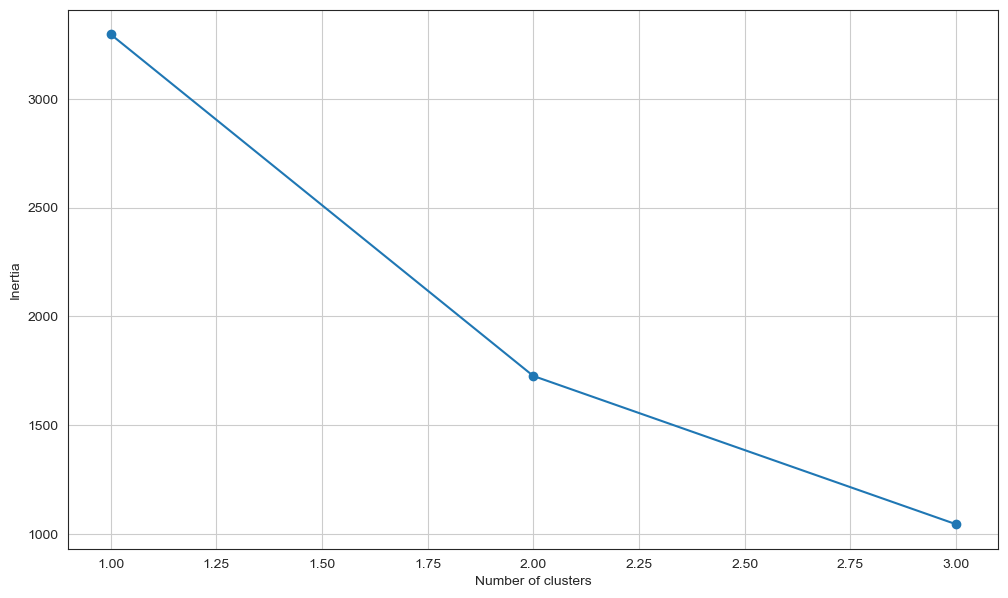

In [35]:
#showing the elbow plot
optimise_k_means(df[['Alcohol_tra','Life expectancy_tra ']], 4)
                 
                

### Comment
Looking at the third plot, the elbow plot shows that the first cluster has a high level of inertia which is just above 3000 so the sum of the squared distance within the given points and also the cluster center is quite high. Once it hits to 2 cluster, the value drops significantly with a value of inhertia being between 1500 and 2000 and further decrease of inhertia as the K-Mean value goes up. So as the clusters increases, inertia decreases

In [36]:
#Setting up the K Means Cluster
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df[['Alcohol_tra','Life expectancy_tra ']]) #comparing with two values

C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=2)

In [37]:
#showing the output

df['kmeans_check2'] = kmeans.labels_ #creating a new column in DF

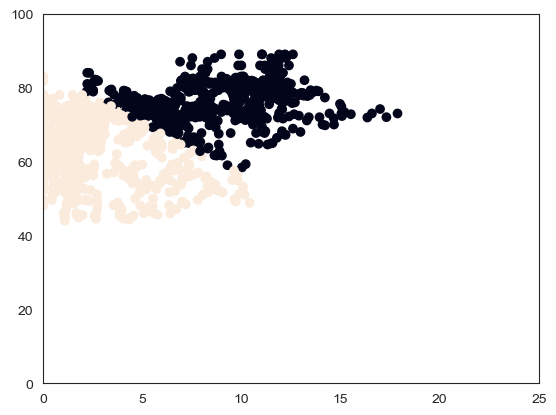

In [38]:
#plotting the scatterplot from the results with the new added column

plt.scatter(x = df['Alcohol'], y = df['Life expectancy '], c = df['kmeans_check2'])

plt.xlim(0, 25)
plt.ylim(0,100)
plt.show()



### Comment

This shows us the density nuetron crossplot which is shown and divided with 2 clusters which shows one on the middle left of the graph and the other just  on the top but hovering towards the right. This graph helps us understand that the total cluster distance between each datapoint. K-Means was used to help break down data points into different groups usually in non overlapping subgroups

### Split the dataset

using the maching learning model, one of the most important tasks is to split the train and test model which helps with predictions and estimates the performance of the model. But first store the values you splitting in a list

In [26]:
#Storing the values in the variables of X and y
X = df[['Country', 'Status', 'Alcohol', 'GDP', 'Life expectancy ' ]]
y = df['Life expectancy ']

In [27]:
#Splits the dataset into a train and test model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 142)
print("training size:", X_train.shape) #prints training size
print("testing size:", X_test.shape) #prints testting size

training size: (1319, 5)
testing size: (330, 5)


### training a linear regression model

Now the next step is to train the linear regression model which will further be used as a predictive model

In [28]:
#trains the regression model

reg_model = linear_model.LinearRegression() #fits a linear model

train_X_model = X_train[['Country', 'Status', 'Alcohol', 'GDP', 'Life expectancy ']]
train_y_model = X_train['Life expectancy ']

test_X_model = X_test[['Country', 'Status', 'Alcohol', 'GDP', 'Life expectancy ']]
test_y_model = X_test['Life expectancy ']

reg_model.fit(train_X_model, train_y_model) #fits the trained data

LinearRegression()

# Comment

In machine learning, Data splitting is recommended as it can avoid overfitting. In this case, the data is splitting into a trainiing and testing model. This helps create a great model which are typically based on the data which indicates the creation of the model like machine learning for its accuracy.

Training a linear regression model is crucial because it is utilised for training the machine learnign algorithm and for it to recognise patterns and to further make predictions.

### Polynomial Regression with parameter analysis

Polynomial Regression is the next step to improve the linear regression model which helps capture non linear relationships within the variables which also helps to ensure that the datapoints are covered which occurs when a non-linear model is presented.

In [29]:
#First scale the data

scaler_check = StandardScaler() #storing the scaler function into a variable called scaler_check
train_X_scaler = scaler_check.fit_transform(X_train)
test_X_scaler = scaler_check.fit_transform(X_test)

In [30]:
#transforming the data
Linear = LinearRegression() #Storing linearRegression function in the variable named Linear
poly_check = PolynomialFeatures(degree = 6)
poly_X_train = poly_check.fit_transform(train_X_scaler)
poly_X_test = poly_check.transform(test_X_scaler)
poly_check.fit(poly_X_train, y_train)
Linear.fit(poly_X_train, y_train)
       

LinearRegression()

### Comment

The Polynomial model that has been created is used to identify nonlinear patterns as is utilised because it can capture the complexity of the relationship unlike linear regressions. The data was transformed which makes it more suitable in the given model which can save time.

### Evaluating with Polynomial Regression

In [31]:
y_prediction_test = Linear.predict(poly_X_test) #predicting the transformed testing data
mean_absolute_error(y_test, y_prediction_test) #retrieving MAE value from original dataset and the poly model for testing

1.022028037860533

In [32]:
y_prediction_train = Linear.predict(poly_X_train) #predicts the transformed trained model
mean_absolute_error(y_train, y_prediction_train) #gets the MAE value value from orignal dataset and the poly model for training

1.143299354607748e-10

### Comment

The model seems to be balanced and is not overfitted or underfitted as both training and testing model has a low MAE value. This shows the actual values and prediction values has almost no difference which presents a very high accuracy of the model. While doing a parameter analysis, it is concluded that Polynomial Regression is the improved version of linear regression as it seems to give the best model performance with the better configuration.

### Describing the  model

Evaluating the performance of the given model with the use of metrics such as MSE, MAE, and r2. This is coming from the original trained model and displaying the predicted and real values

In [33]:
prediction = reg_model.predict(test_X_model) #predictive model for the testing model
mse_pred = ((np.array(test_y_model)-prediction)**2).sum()/len(test_y_model) #formula used to calculate MSE
r2_pred = r2_score(test_y_model, prediction) #gets the r2 value
mae_predict = mean_absolute_error(y_test, prediction) #The difference value between the real and predictiver value

#prints the values of means squared error, R2 and MAE
print("MSE value is:", mse_pred)
print("R Squared value is:", r2_pred )
print("MAE is:", mae_predict)

MSE value is: 1.433527598917989e-28
R Squared value is: 1.0
MAE is: 6.911642975120975e-15


In [34]:
#Checks the values for the real and predictive value
df = pd.DataFrame(data ={"real values": y_test, "The Predicted Values": prediction})
df

,real values,The Predicted Values
2032,67.3,67.3
1875,73.0,73.0
1820,67.0,67.0
18,77.2,77.2
2440,79.1,79.1
...,...,...
247,79.5,79.5
2645,72.0,72.0
2935,44.8,44.8
402,59.0,59.0


### Comment

The dataset was evaluated from the linear regression model which help us retreive  the MSE value which tells us how close the esitmation is to the actual value and measures the number of errors in the model which was 1.43. The R^2 helps measure the strength of the relationship. Suprising, the R squared value is 1 which means the prediction value is identical to the actual value. MAE shows the difference between the prediction and actual value which gave us the value of almost 0.

### Conclusion

In conclusion, the dataset has been created and analysed to its fullest extent.  Questions and analysis were defined, the data was cleaned, multiple analysis techniques were used throughout the work. Moreover data exploration was conducted with variable identification, univariate and bivariate analysis. Linear regression was used to train and split the dataset and was further enhanced with polynomial regression. Different variety of graphs were used like scatterplot for a visual representation to see the correlation, histographs, elbow plot etc. The dataset was evaulated, algorithm models was shown and being improved by utilising different techniques and creating more complex models.